In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## divide dataset into independent and dependent features

In [4]:
# credit score to estimated salary is independent and exited is dependent
X = dataset.iloc[:,3:-1]
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [5]:
# dependent valriable
y=dataset.iloc[:,-1]
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [6]:
## Feature engineering
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [8]:
X.drop(['Geography','Gender'],axis=1,inplace=True) # drop these column not rows
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [9]:
# concat one hot encoded variables in X
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False


# splitting the dataset into training set and test set

In [10]:
# splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
# Here, 0.2 means 20% of the data will be used for testing, and the remaining 80% will be used for training.

# Feature Scaling

In [11]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [12]:
X_train.shape

(8000, 11)

# create ANN

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU,PReLU,ELU,ReLU,Dropout

In [28]:
## initialize ANN
classifier = Sequential()

In [29]:
## adding input layer
classifier.add(Dense(units=11,activation='relu'))

In [30]:
## adding first hidden layer and dropout to prevent overfitting
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))
## adding second hidden layer
classifier.add(Dense(units=6,activation='relu'))
classifier.add(Dropout(0.3))

In [31]:
## adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [32]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) # adam default learning rate=0.01

## Early Stopping

In [33]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [34]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5147 - loss: 0.7569 - val_accuracy: 0.7955 - val_loss: 0.5700
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7989 - loss: 0.5431 - val_accuracy: 0.7967 - val_loss: 0.4719
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7990 - loss: 0.4938 - val_accuracy: 0.8008 - val_loss: 0.4482
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8083 - loss: 0.4645 - val_accuracy: 0.8103 - val_loss: 0.4374
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8141 - loss: 0.4497 - val_accuracy: 0.8205 - val_loss: 0.4290
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8182 - loss: 0.4466 - val_accuracy: 0.8217 - val_loss: 0.4249
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8161 - loss: 0.4347 - val_accuracy: 0.8220 - val_loss: 0.4236
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8237 - loss: 0.4327 - 

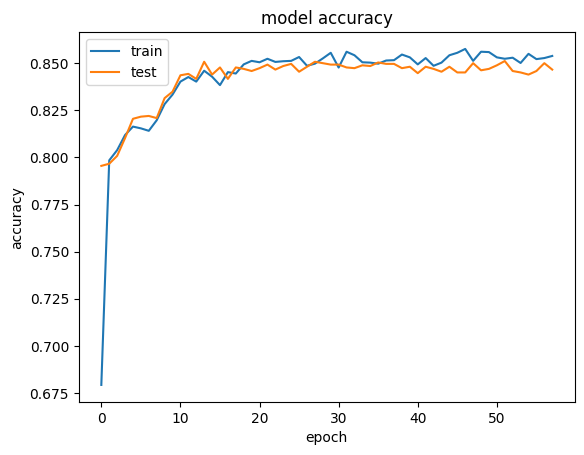

In [35]:
## summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

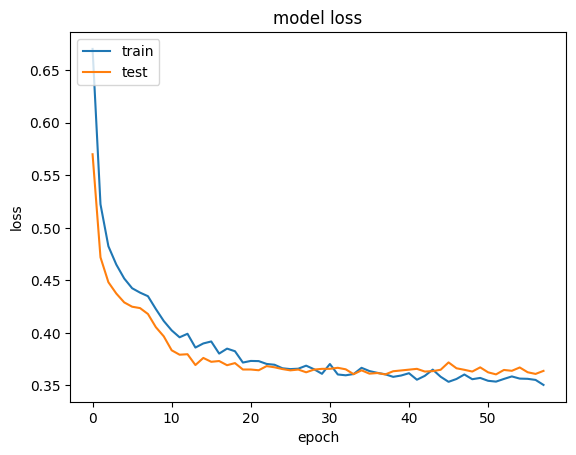

In [36]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

# Predections and evaluating the model

In [37]:
# predicting the test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
cm
score=accuracy_score(y_test,y_pred)
score

0.86

In [39]:
## get weights
classifier.get_weights()

[array([[ 0.09311654, -0.01497977,  0.0991228 , -0.20324077, -0.2897013 ,
         -0.02593891, -0.0156841 ,  0.21638484, -0.34594786, -0.24352488,
          0.2522995 ],
        [-0.65388125,  0.7217785 , -0.07339212, -0.3748563 ,  0.07124809,
          0.46668246,  0.22075638,  0.48787934,  0.04469922,  0.03970261,
         -0.10109912],
        [ 0.08587141, -0.01064475,  0.25838506, -0.20465735,  0.06691064,
          0.04853232, -0.08037801,  0.25280672,  0.34936023, -0.10613324,
          0.32181957],
        [ 0.01950804, -0.03381153, -0.8719709 , -0.17268424,  0.11452267,
         -0.24251552,  0.2728761 , -0.07255511,  0.2918902 , -0.2604481 ,
         -0.21848892],
        [-0.07545543, -0.06136504,  0.15142976, -0.00200905, -0.26270846,
         -1.1595618 ,  0.96366227, -0.03280167, -0.24492091, -0.11736332,
          0.5942566 ],
        [-0.01545734,  0.07296282, -0.18519253,  0.26019186,  0.07628275,
          0.03583774, -0.0156626 ,  0.07833973,  0.03642891, -0.1867706